# Text Sentiment Analysis Outline:

In this project Corpus text file is analyzed. Preprocessing of text data involves transforming raw data into an understandable format for NLP models.

 - Exploratory Data Analysis
 - changing all the text content to lower case.
 - Tokenization 
 - Word Lemmatization 
 - Splitting data into Train and Test datasets
 - Encoding labels 
 - Word Vectorization
 - Visualizing NLP with Wordcloud
 - Fitting SVM Algorithm and Evaluating the Model
 - Fitting ANN algorithm and model optimization
 - Conclusion


# Exploratory Data Analysis

In [1]:
#Importing Packages
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras import regularizers
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt

from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Keeru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Keeru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Keeru\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keeru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
np.random.seed(500)

In [3]:
#reading the csv file
Corpus = pd.read_csv("corpus.csv",encoding='latin-1')
Corpus

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2
...,...,...
9995,A revelation of life in small town America in...,__label__2
9996,Great biography of a very interesting journal...,__label__2
9997,Interesting Subject; Poor Presentation: You'd...,__label__1
9998,Don't buy: The box looked used and it is obvi...,__label__1


In [4]:
# Checking the top 5 rows
Corpus.head() 

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


In [5]:
#Checking the summary of the given dataframe
#and Checking if there is any blank rows
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
#checking unique label
Corpus.label.nunique()

2

In [7]:
#checking data type
Corpus.dtypes

text     object
label    object
dtype: object

In [8]:
# Checking descriptive statistics
Corpus.describe()

,text,label
count,10000,10000
unique,10000,2
top,Don't waste your money: This game is based on...,__label__1
freq,1,5097


Text(0.5, 0, 'label')

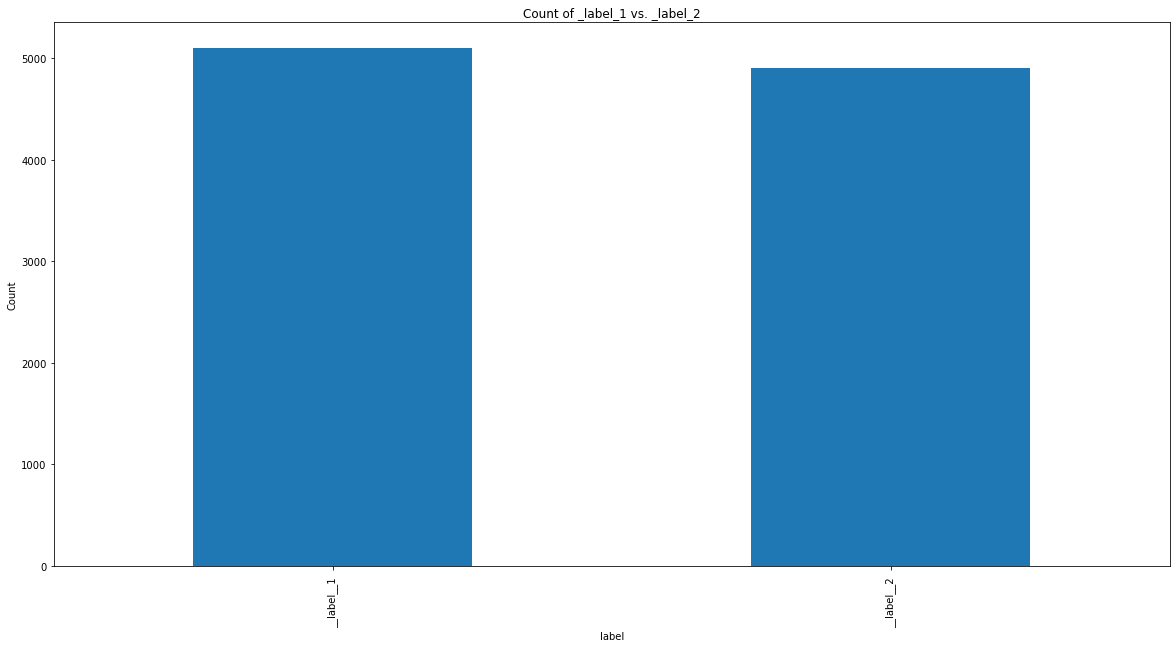

In [9]:
#Checking count for label feature
Corpus.groupby('label').text.count().plot(kind='bar',stacked=True, figsize=(20,10))
plt.title('Count of _label_1 vs. _label_2')
plt.ylabel('Count')
plt.xlabel('label')

Observation :

Based on the graph above, our data set is very balanced.

#  changing all the text content to lower case.

In [10]:
#Change all the text to lower case
Corpus = Corpus.applymap(lambda s:s.lower())

# Tokenization

Tokenization to break a stream of text into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens becomes input for further processing.

In [11]:
#Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

# Word Lemmatization

Word Lemmatization to reduce the inflectional forms of each word into a common base or root, as well as to remove Stop words.. Lemmatization is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

In [12]:
# Remove Stop words and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)


In [13]:
Corpus

,text,label,text_final
0,"[stuning, even, for, the, non-gamer, :, this, ...",__label__2,"['stun', 'even', 'sound', 'track', 'beautiful'..."
1,"[the, best, soundtrack, ever, to, anything, .,...",__label__2,"['best', 'soundtrack', 'ever', 'anything', 're..."
2,"[amazing, !, :, this, soundtrack, is, my, favo...",__label__2,"['amaze', 'soundtrack', 'favorite', 'music', '..."
3,"[excellent, soundtrack, :, i, truly, like, thi...",__label__2,"['excellent', 'soundtrack', 'truly', 'like', '..."
4,"[remember, ,, pull, your, jaw, off, the, floor...",__label__2,"['remember', 'pull', 'jaw', 'floor', 'hear', '..."
...,...,...,...
9995,"[a, revelation, of, life, in, small, town, ame...",__label__2,"['revelation', 'life', 'small', 'town', 'ameri..."
9996,"[great, biography, of, a, very, interesting, j...",__label__2,"['great', 'biography', 'interesting', 'journal..."
9997,"[interesting, subject, ;, poor, presentation, ...",__label__1,"['interest', 'subject', 'poor', 'presentation'..."
9998,"[do, n't, buy, :, the, box, looked, used, and,...",__label__1,"['buy', 'box', 'look', 'use', 'obviously', 'ne..."


# Prepare Test and Train Datasets

In [14]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

# Encoding

Label encode the target variable — This is done to transform Categorical data of string type in the data set into numerical values which the model can understand.

In [15]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# Word Vectorization

Word Vectorization to turn a collection of text documents into numerical feature vectors.

In [16]:
# It is better to tokenize based on Frequency instead of occurance since a word might be used many times in a few long documents
# To avoid this issue, the number of occurrences of each word in a document is divided by the total number of words in the document tf for Term Frequencies
tfidf_transformer = TfidfTransformer()
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [17]:
print(Tfidf_vect.get_feature_names())

['aa', 'abandon', 'ability', 'able', 'abroad', 'absent', 'absolute', 'absolutely', 'absolutly', 'absorb', 'absurd', 'abuse', 'ac', 'academic', 'academy', 'accent', 'accept', 'acceptable', 'access', 'accessible', 'accessory', 'accident', 'accidentally', 'acclaim', 'accompany', 'accomplish', 'accomplishment', 'accord', 'account', 'accuracy', 'accurate', 'accurately', 'achieve', 'acid', 'acknowledge', 'acne', 'acoustic', 'acquire', 'across', 'act', 'acting', 'action', 'active', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adaptation', 'adapter', 'adaptor', 'add', 'added', 'addict', 'addiction', 'addition', 'additional', 'address', 'adequate', 'adjective', 'adjust', 'adjustable', 'adjustment', 'admire', 'admit', 'admittedly', 'adopt', 'adorable', 'adore', 'adult', 'adultery', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advertised', 'advertisement', 'advertising', 'advice', 'advise', 'advocate', 'aerial', 'aesthetic', 'affair', 'affect', '

In [18]:
# each row shows 1: Row number of ‘Train_X_Tfidf’, 2: Unique Integer number of each word in the first row, 
#3: Score calculated by TF-IDF Vectorizer
print(Train_X_Tfidf)

  (0, 4492)	0.37634188677099956
  (0, 4491)	0.1502086671688917
  (0, 3945)	0.35870975205557054
  (0, 3861)	0.25152943577361386
  (0, 3831)	0.2690840463105974
  (0, 3723)	0.3469774999759746
  (0, 3642)	0.28971770688512954
  (0, 3553)	0.29440491517773787
  (0, 2955)	0.22969709983777647
  (0, 1967)	0.13398240399394393
  (0, 1543)	0.17762585383071805
  (0, 512)	0.3210759641783664
  (0, 482)	0.1230432680090133
  (0, 243)	0.24487094004433968
  (1, 4690)	0.36974013511943044
  (1, 4043)	0.6167222431544791
  (1, 3431)	0.367922932130556
  (1, 2634)	0.3755181501193181
  (1, 1253)	0.3587203442870721
  (1, 595)	0.27907786873623097
  (2, 4737)	0.21254760778273238
  (2, 4620)	0.17350284094477353
  (2, 4452)	0.11900470145263356
  (2, 4178)	0.13517671323243532
  (2, 3823)	0.26661119879415307
  :	:
  (6998, 2561)	0.11515961575144278
  (6998, 2156)	0.13654425766350872
  (6998, 2003)	0.07125207506420554
  (6998, 1805)	0.22020146972839663
  (6998, 1771)	0.19941178219513117
  (6998, 1733)	0.1351314704611587

# Visualizing NLP with Wordcloud

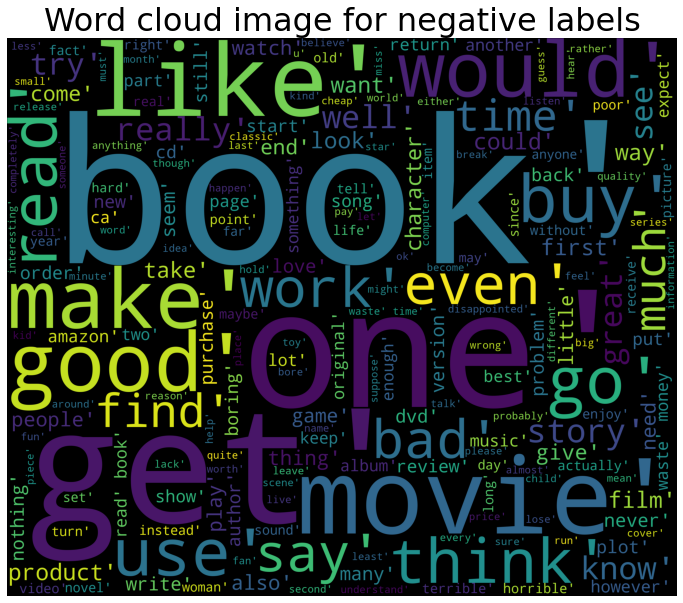

In [19]:
# Way to create image from simple word count
from wordcloud import WordCloud, STOPWORDS
words = ' '.join(Corpus[Corpus['label'] =='__label__1 ']['text_final'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                     
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Word cloud image for negative labels", size = 32)
plt.axis('off')
plt.show()

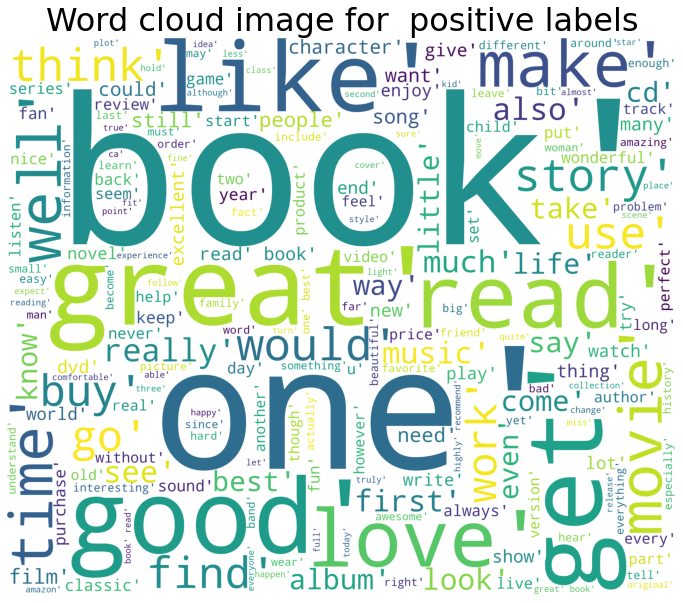

In [20]:
# Way to create image from simple word count
from wordcloud import WordCloud, STOPWORDS
words = ' '.join(Corpus[Corpus['label'] =='__label__2 ']['text_final'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
                     
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Word cloud image for  positive labels", size = 32)
plt.axis('off')
plt.show()

# Fitting SVM Algorithm and Evaluating the Model

In [21]:
# Classifier - SVM
# fit the training data on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.56666666666666


In [22]:
# Checking the accuracy of SVM model with kernel='linear'
SVM = svm.SVC(C=1.0, kernel='linear', gamma=0.001)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.56666666666666


In [23]:
# Checking the accuracy of SVM model with kernel='rbf'
SVM = svm.SVC(C=1.0, kernel='rbf', gamma=1.0)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  85.16666666666667


In [44]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVM, Train_X_Tfidf,Train_Y, cv=5)

In [45]:
cv_results['test_score'].mean()

0.8460000000000001

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Results for SVM Classifier")
print("Accuracy Score : ",accuracy_score(predictions_SVM, Test_Y),"\n\n")

print(pd.DataFrame(confusion_matrix( Test_Y, predictions_SVM)))

print(classification_report( Test_Y, predictions_SVM))

Results for SVM Classifier
Accuracy Score :  0.8516666666666667 


      0     1
0  1308   230
1   215  1247
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1538
           1       0.84      0.85      0.85      1462

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



Fitted SVM Model and also evaluated the Model

#  Fitting ANN Algorithm and optimization

In [34]:
vocab_size = 5000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok='<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(Train_X)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(Train_X)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(Test_X)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           80000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 80,109
Trainable params: 80,109
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 20
history = model.fit(padded, Train_Y, epochs=num_epochs, validation_data=(testing_padded, Test_Y))

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.6912 - accuracy: 0.5623 - val_loss: 0.6775 - val_accuracy: 0.6280
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.6595 - accuracy: 0.7569 - val_loss: 0.5935 - val_accuracy: 0.8037
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.5405 - accuracy: 0.8396 - val_loss: 0.4735 - val_accuracy: 0.8310
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.4132 - accuracy: 0.8815 - val_loss: 0.3970 - val_accuracy: 0.8477
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.3191 - accuracy: 0.8979 - val_loss: 0.3641 - val_accuracy: 0.8517
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.2797 - accuracy: 0.9096 - val_loss: 0.3475 - val_accuracy: 0.8573
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.2340 - accuracy: 0.9233 - val_loss: 0.3429 - val_accuracy: 0.8570
Epoch 

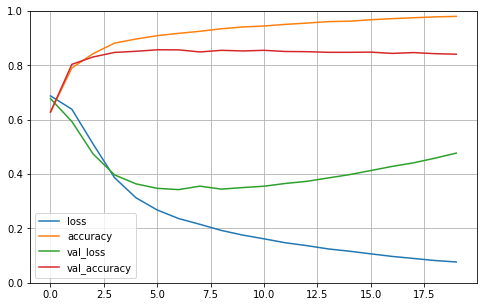

In [37]:
#Plot loss and accuracy of model for each epoch
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

The graph above clearly shows that the model is overfitting the training data. There are several ways to avoid overfitting such as adding regualizers and decreasing the network size. Also adding more training data can help to have a higher accuracy for validation data. These parameters were changed several times and following is one of the good results.

In [38]:
# Increasing vocab size, max_length, and adding drop out layers in ANN
vocab_size = 40000
embedding_dim = 16
max_length = 200
trunc_type='post'
oov_tok='<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(Train_X)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(Train_X)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(Test_X)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
________________________________________________

In [40]:
num_epochs = 20
history = model.fit(padded, Train_Y, epochs=num_epochs, validation_data=(testing_padded, Test_Y))

Epoch 1/20
219/219 [==============================] - 7s 17ms/step - loss: 0.6944 - accuracy: 0.4866 - val_loss: 0.6918 - val_accuracy: 0.5130
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.6918 - accuracy: 0.5388 - val_loss: 0.6883 - val_accuracy: 0.5200
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.6857 - accuracy: 0.5681 - val_loss: 0.6735 - val_accuracy: 0.7337
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.6642 - accuracy: 0.6382 - val_loss: 0.6301 - val_accuracy: 0.6293
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.6056 - accuracy: 0.7038 - val_loss: 0.5542 - val_accuracy: 0.8297
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.5347 - accuracy: 0.7733 - val_loss: 0.4879 - val_accuracy: 0.8257
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.4762 - accuracy: 0.8123 - val_loss: 0.4401 - val_accuracy: 0.8410

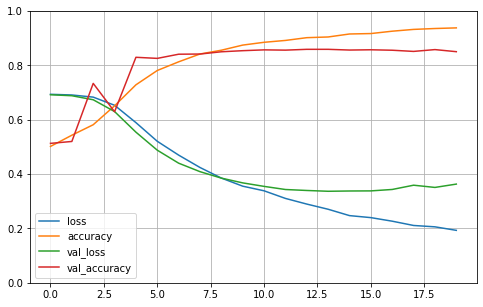

In [41]:
#Plot loss and accuracy of model for each epoch
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

We can see that the distance between accuracy and loss values of training and validation data have decreased which means that overfitting has been decreased.

# Conclusion

We have implemented different machine learning models. Fitted SVM and ANN model and also optimized the hyperparameters.